#  Heart Failure Analysis

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


### Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [317]:
heart=pd.read_csv("HeartFailureDataset - datasets_727551_1263738_heart_failure_clinical_records_dataset.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


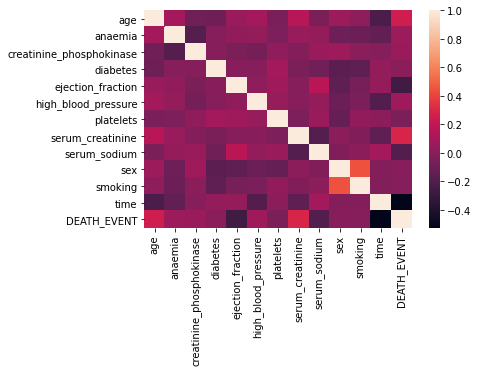

In [318]:
sns.heatmap(heart.corr())

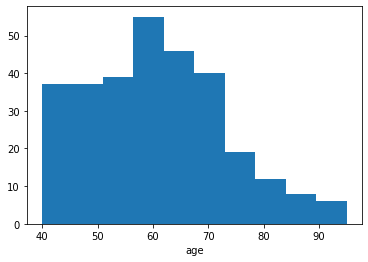

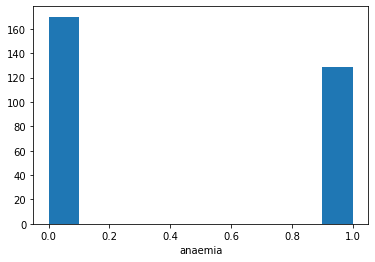

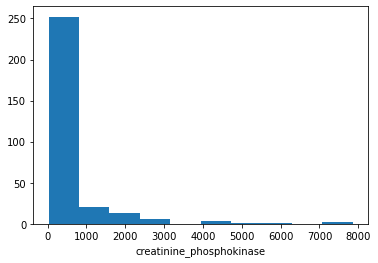

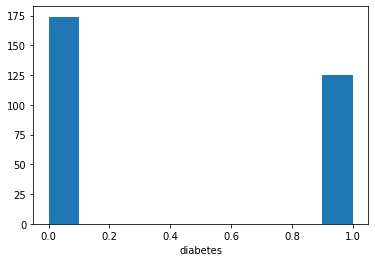

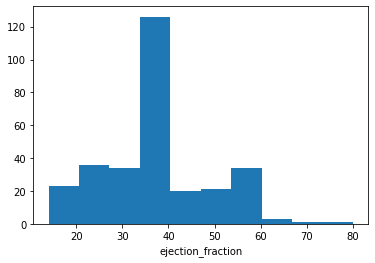

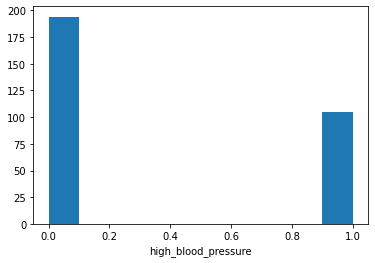

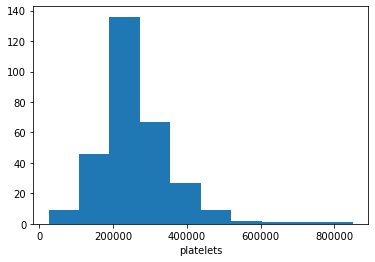

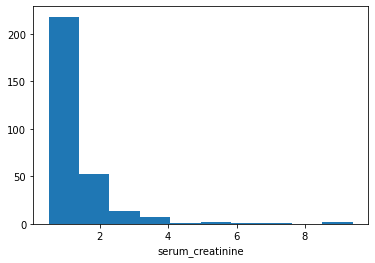

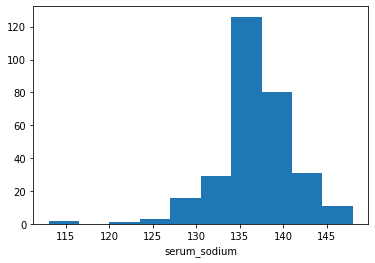

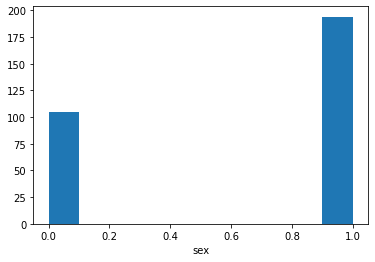

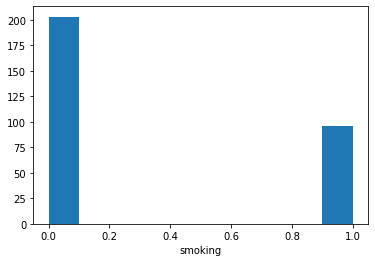

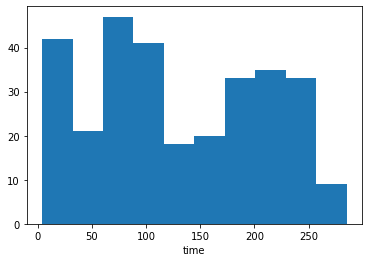

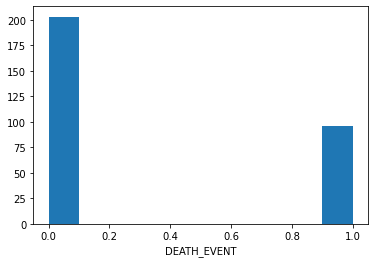

In [319]:
def plots(dist):
    plt.hist(heart[dist])
    plt.xlabel(dist)
    plt.show()
    
for x in heart:
    plots(x)



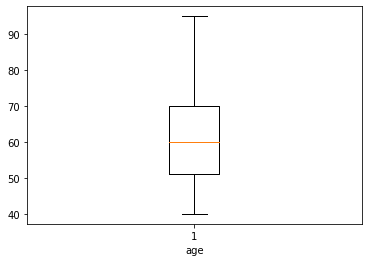

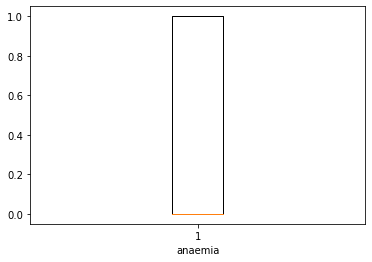

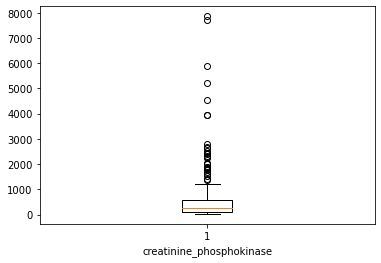

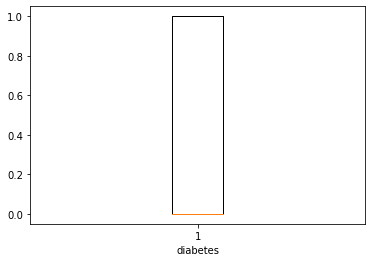

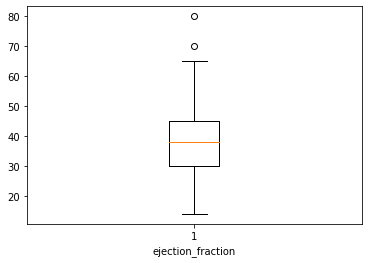

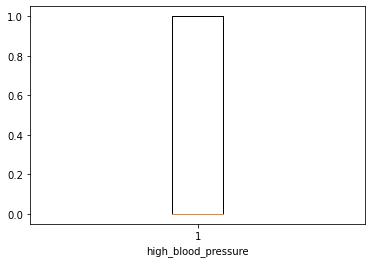

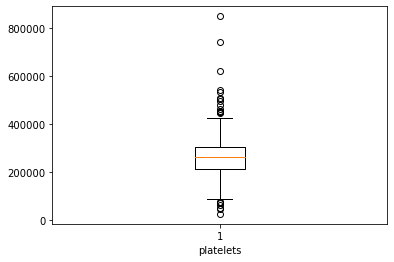

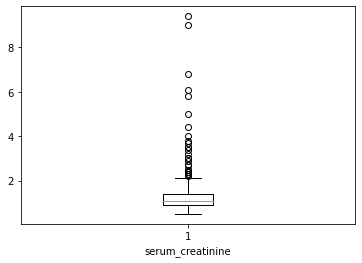

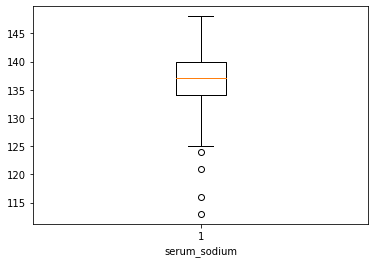

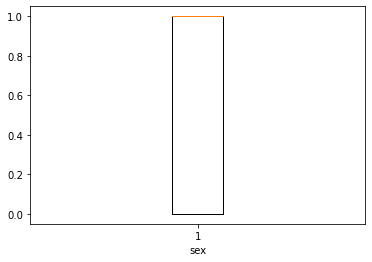

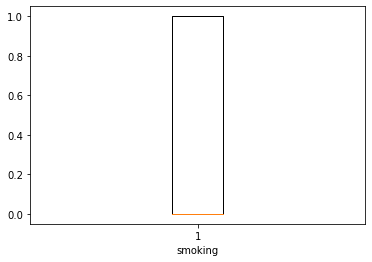

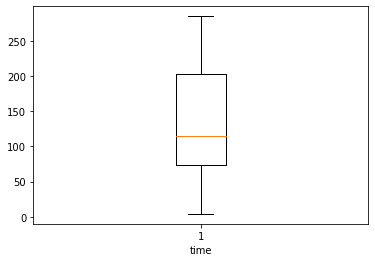

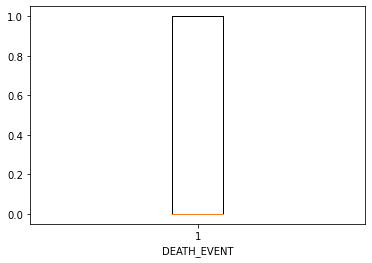

In [320]:
def plots(dist):
    plt.boxplot(heart[dist])
    plt.xlabel(dist)
    plt.show()
    
for x in heart:
    plots(x)

In [321]:
heart['creatinine_phosphokinase']=np.log(heart['creatinine_phosphokinase'])
heart['platelets']=np.log(heart['platelets'])
heart['serum_creatinine']=np.log(heart['serum_creatinine'])
heart['serum_sodium']=np.log(heart['serum_sodium'])

In [322]:

X=heart.drop(['DEATH_EVENT'],axis=1).values
y=heart['DEATH_EVENT']
#'anaemia','high_blood_pressure','sex','smoking'

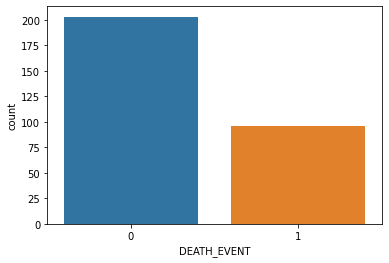

In [323]:
sns.countplot(y)

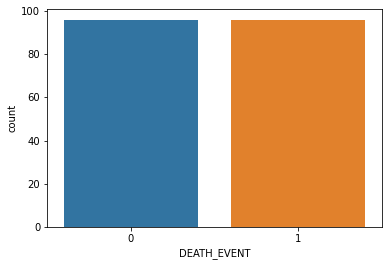

In [324]:
from imblearn.over_sampling import SMOTE
samp = SMOTE()
x_res1,y_res1=samp.fit_sample(X,y)
sns.countplot(y_res)

In [326]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res1, y_res1, test_size = 0.3, random_state =0)

In [327]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### XGBOOST

In [416]:
import xgboost as xgb
from xgboost import XGBClassifier
XGB=XGBClassifier(n_estimators=100,learning_rate=0.06,max_depth=45,random_state=0)
XGB.fit(x_train,y_train)
ypred=XGB.predict(x_test)

[[43 10]
 [ 5 64]]
Overall accuracy score is  0.8770491803278688
Accurcay for class 0 is  0.8113207547169812
Accuracy for class 1 is  0.927536231884058


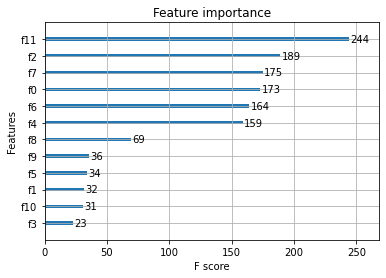

In [417]:
cm=confusion_matrix(y_test,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(y_test,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))
xgb.plot_importance(XGB)

### Logistic Regression

In [390]:
from sklearn.linear_model import LogisticRegression
LRG=LogisticRegression()
LRG.fit(x_train,y_train)
ypred=LRG.predict(x_test)

In [391]:
cm=confusion_matrix(y_test,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(y_test,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))


[[42 11]
 [12 57]]
Overall accuracy score is  0.8114754098360656
Accurcay for class 0 is  0.7924528301886793
Accuracy for class 1 is  0.8260869565217391


### Decision Tree

In [388]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=20,criterion='entropy',random_state=0)
DTC.fit(x_train,y_train)
ypred=DTC.predict(x_test)

In [389]:
cm=confusion_matrix(y_test,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(y_test,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[43 10]
 [13 56]]
Overall accuracy score is  0.8114754098360656
Accurcay for class 0 is  0.8113207547169812
Accuracy for class 1 is  0.8115942028985508


### Random Forest

In [382]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,max_depth=40,criterion='entropy',random_state=0)
RFC.fit(x_train,y_train)
ypred=RFC.predict(x_test)

In [383]:
cm=confusion_matrix(y_test,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(y_test,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[45  8]
 [ 4 65]]
Overall accuracy score is  0.9016393442622951
Accurcay for class 0 is  0.8490566037735849
Accuracy for class 1 is  0.9420289855072463


### SVC

In [430]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf')
SVC.fit(x_train,y_train)
ypred=SVC.predict(x_test)

In [431]:
cm=confusion_matrix(y_test,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(y_test,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[42 11]
 [ 7 62]]
Overall accuracy score is  0.8524590163934426
Accurcay for class 0 is  0.7924528301886793
Accuracy for class 1 is  0.8985507246376812


### LDA

In [350]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA = LDA()
LDA.fit(x_train,y_train)
ypred=LDA.predict(x_test)

In [351]:
cm=confusion_matrix(y_test,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(y_test,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[43 10]
 [13 56]]
Overall accuracy score is  0.8114754098360656
Accurcay for class 0 is  0.8113207547169812
Accuracy for class 1 is  0.8115942028985508


## Voating Classifier

In [451]:
from sklearn.ensemble import VotingClassifier
estimators=[('RFC',RFC),('LGBM',LGBM)]
ens=VotingClassifier(estimators=estimators,voting='soft')
ens.fit(x_train,y_train)
ypred=ens.predict(x_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


In [452]:
cm=confusion_matrix(y_test,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(y_test,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[45  8]
 [ 5 64]]
Overall accuracy score is  0.8934426229508197
Accurcay for class 0 is  0.8490566037735849
Accuracy for class 1 is  0.927536231884058


In [449]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(n_estimators=100,learning_rate=0.06,max_depth=20,random_state=0,num_leaves=31)
LGBM.fit(x_train,y_train)
ypred=LGBM.predict(x_test)

In [450]:
cm=confusion_matrix(y_test,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(y_test,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[44  9]
 [ 6 63]]
Overall accuracy score is  0.8770491803278688
Accurcay for class 0 is  0.8301886792452831
Accuracy for class 1 is  0.9130434782608695
